In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
- average time (numeric continuous values) to sell for two different groups (categories)

Form a hypothesis:

$H_0$ = There is no difference in average time to sell at two offices   
$H_a$ = There is difference in average time to sell at two offices

Significance level $\alpha$ = 0.05

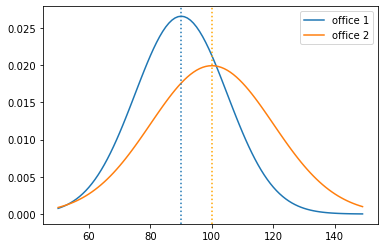

In [2]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')


plt.legend()

In [4]:
#Using Scipy 
α = 0.05
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

t, p = stats.ttest_ind_from_stats(100,20,50, 90,15,40)
t,p

(2.6252287036468456, 0.01020985244923939)

In [7]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')


Because the p-value (0.01020985244923939) is less than alpha value (0.05),we reject the null hypothesis


In [37]:
# Can be calculated in  python using the formula for two- 
# sample t-test

α = 0.05

# Sample means:
xbar1 = 90
xbar2 = 100

# Given sample size:
n1 = 40
n2 = 50

# given std deviations:
s1 = 15
s2 = 20


# Degrees of freedom
degf = n1 + n2 - 2

# Calculate pooled standard deviation:
s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2)/
           (n1 + n2 - 2))

# Calculate t-statistic value
t = (xbar2 - xbar1) / (s_p * sqrt(1 / n1 + 1 / n2))

print(f't = {t:.4}')

t = 2.625


In [38]:
#Calculate p value for calculated t-statistic
p = stats.t(degf).sf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


### 2. Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  
Are compact cars more fuel-efficient than the average car?  
Do manual cars get better gas mileage than automatic cars?

In [2]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


#### 1.  Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)


$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999  
$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving


- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [3]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [4]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

In [5]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [6]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [7]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

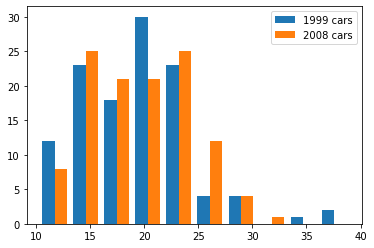

In [8]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

#### 2. Are compact cars more fuel-efficient than the average car?


Comparing fuel economy two different sub-groups (1-sample, 1-tailed t-test)

$H_0$: There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency  
$H_a$: Compact cars are more fuel efficient than the average car

for $H_a$ to be true, t > 0 and  p/2 < 0.05

In [9]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [10]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



#### Do manual cars get better gas mileage than automatic cars?

$H_0$: there is no difference in fuel-efficiency between manual cars and automatic transmission cars  
$H_a$: there is a difference in fuel-efficiency between manual cars and automatic transmission cars

In [11]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [12]:
t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [13]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [14]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

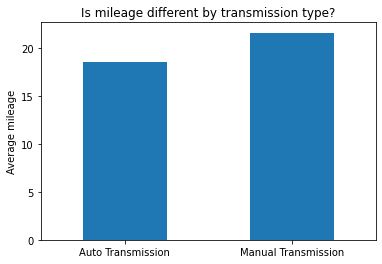

In [32]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')